In [23]:
!pip install python-docx 


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
import os 
from docx import Document 
from itertools import chain

# docText = '\n\n'.join(
#     paragraph.text for paragraph in doc_try.paragraphs
# ).split('\n')

# docText = list(filter(lambda a: a != '', docText))
# docText = list(chain.from_iterable([line.split('\xa0') for line in docText]))

# set_1 = [] # set_1 - отдельные слова 
# for line in docText:
#     set_1.extend(line.split()) 


In [26]:
!pip install pymorphy2


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
def normal_form_by_file(file):
    doc_try = Document(file)
    docText = '\n\n'.join(
        paragraph.text for paragraph in doc_try.paragraphs
    ).split('\n')

    docText = list(chain.from_iterable([line.split('\xa0') for line in docText]))

    set_1 = [] 
    for line in docText:
        set_1.extend(line.split()) 
    
    return set_1

In [28]:
import re

def one_word_process(word: str):
    if (word != ''): new_word = word 

    sre = r'(^\W+\w+)|(\w+\W+)$|(.+\W$)'
    if re.match(sre, word): 
        new_word = ''.join(char for char in word if char.isalnum())
    elif re.match(r'\W+', new_word): return False # проверка на отдельный симв.
    elif re.match(r'\d{1,2}', new_word): return False # на 1-2 цифры
    elif word == ' ': return False
    else: new_word = word
    # if not re.match(r'\W+', word): new_word = word
    return new_word

In [29]:
import os 

path = os.path.abspath('words.ipynb')[:-11]

# punctuation_string = string.punctuation + 
all_files_words = []

for file in os.listdir(path): 
    if not file.endswith('.ipynb'):
        new_list = normal_form_by_file(os.path.abspath(file))
        all_files_words.extend(new_list)

# слова без словосочетаний (первонач. вид) 
set_without_phrases = [one_word_process(w) for w in all_files_words if (one_word_process(w) not in (False, ''))]

In [30]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
tags_to_delete = ['PREP', 'CONJ', 'PRCL', 'INTJ', 'NPRO']

def tags_check(word): 
    """Находит и удаляет служебные части речи"""
    
    n_f = morph.parse(word)[0].normal_form # нормальная форма 
    # returned_word = morph.parse(word)[0].word

    # Проверка на служебные части речи 
    if not (morph.parse(word)[0].tag.POS in tags_to_delete): return n_f
    # Проверка на аббревиатуру 
    elif re.match(word, r'[А-Я]'): return word

In [31]:
def create_phrase(words_list, idx: int):
    """Составляет словосочетания"""

    curr_word, prev_word, next_word = words_list[idx][:], words_list[idx-1][:], words_list[idx+1][:]
    # # Нахождение предлога - связать два слова: 
    # if morph.parse(curr_word)[0].tag.POS == 'PREP': 
    #     words_list.pop(idx-1)
    #     words_list.pop(idx+1)
    #     return ' '.join([prev_word, curr_word, next_word])
    # else: return curr_word 
    # словосоч. по творительному падежу 
    # if morph.parse(curr_word)[0].tag.case == 'gent': 
    #     words_list.pop(idx-1)
    #     return ' '.join([prev_word, curr_word])
    # else: return curr_word

    

In [32]:
# set_with_phrases = [create_phrase(set_without_phrases, i) for i, el in enumerate(set_without_phrases) if i != len(set_without_phrases)-1]

In [33]:
# Сет без предлогов и словосочетаний: 
set_cleaned = [tags_check(word) for word in set_without_phrases if tags_check(word)] 

### Удаление ненужных слов

In [34]:
# def delete_redundant_words(initial_list: list, redundant: list):
#     return list(set(initial_list) - set(redundant))

# Исходный список: set_cleaned

# ================ Список на удаление ====================== 
words_to_delete = ['of', 'подготовка']
# ==========================================================

if len(words_to_delete): 
    set_cleaned = [w for w in set_cleaned if not w.lower() in words_to_delete]


### Частотность для значений: 

In [35]:
import pandas as pd 

# Частотность слов списка: 
words_df = pd.DataFrame(data=set_cleaned)
frequencies = pd.DataFrame(words_df.value_counts(), columns=['Кол-во'])
frequencies = frequencies.reset_index()
frequencies.columns = ['Word', 'Count']
all_c = sum(frequencies.Count)
frequencies['% of all'] = round((frequencies['Count'] / all_c) * 100, 1)

frequencies.sort_values(by='Count', ascending=False).head(15)

,Word,Count,% of all
0,работа,400,2.1
1,налоговый,397,2.1
2,компания,206,1.1
3,год,201,1.1
4,месяц,195,1.0
5,россия,186,1.0
6,москва,173,0.9
7,время,131,0.7
8,право,117,0.6
9,консультант,107,0.6


In [36]:
frequencies.tail(10)

,Word,Count,% of all
2871,оoо,1,0.0
2872,нэбауман,1,0.0
2873,server,1,0.0
2874,нп,1,0.0
2875,setting,1,0.0
2876,several,1,0.0
2877,sharing,1,0.0
2878,нордсм,1,0.0
2879,номенклатура,1,0.0
2880,0,1,0.0


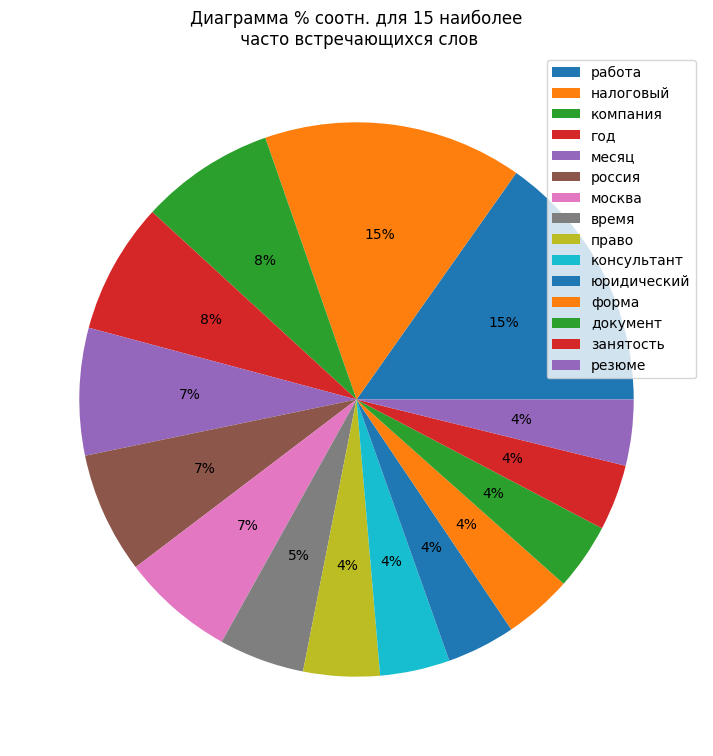

In [37]:
import matplotlib.pyplot as plt

n = 15 # кол-во слов на диаграмме
data_to_pie = frequencies.head(n)
# other_words = pd.DataFrame({'Word': ['другие'], 'Count': [sum(frequencies[n+1:].Count)]})
# other_words = pd.DataFrame({'Word': ['другие'], 'Count': [100]})
# data_to_pie = pd.concat([data_to_pie, other_words])
fig, ax = plt.subplots(figsize=(9, 9))
ax.pie(x=data_to_pie.Count, autopct='%1.0f%%')
plt.title(f'Диаграмма % соотн. для {n} наиболее\n часто встречающихся слов')
plt.legend(list(data_to_pie.Word));

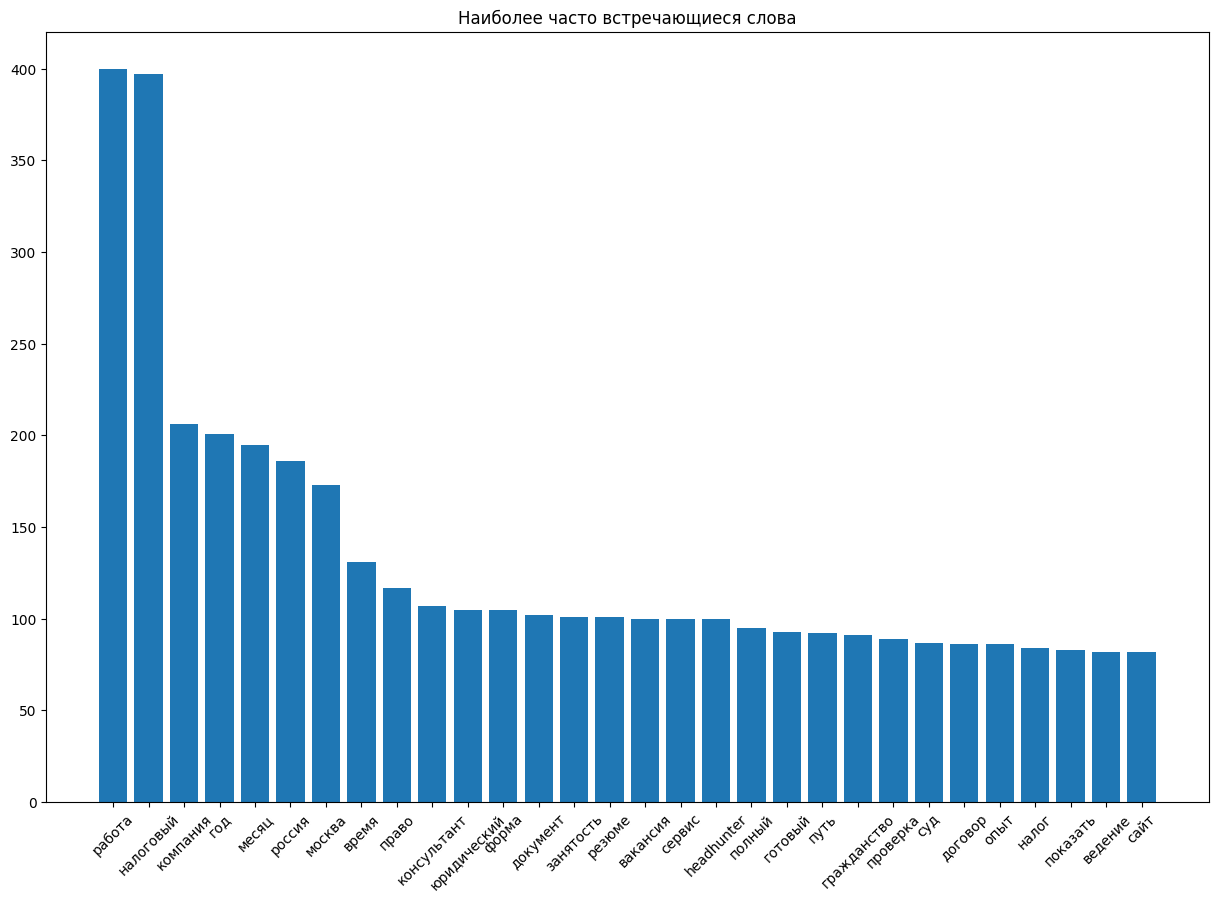

In [38]:
data = frequencies.head(30)
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(data.Word, data.Count)
plt.title('Наиболее часто встречающиеся слова')
plt.xticks(rotation=45);

In [39]:
!pip install nltk


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import nltk

text = nltk.Text(set_cleaned)
fdist = nltk.probability.FreqDist(text)

In [41]:
!pip install wordcloud


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(-0.5, 1919.5, 1079.5, -0.5)

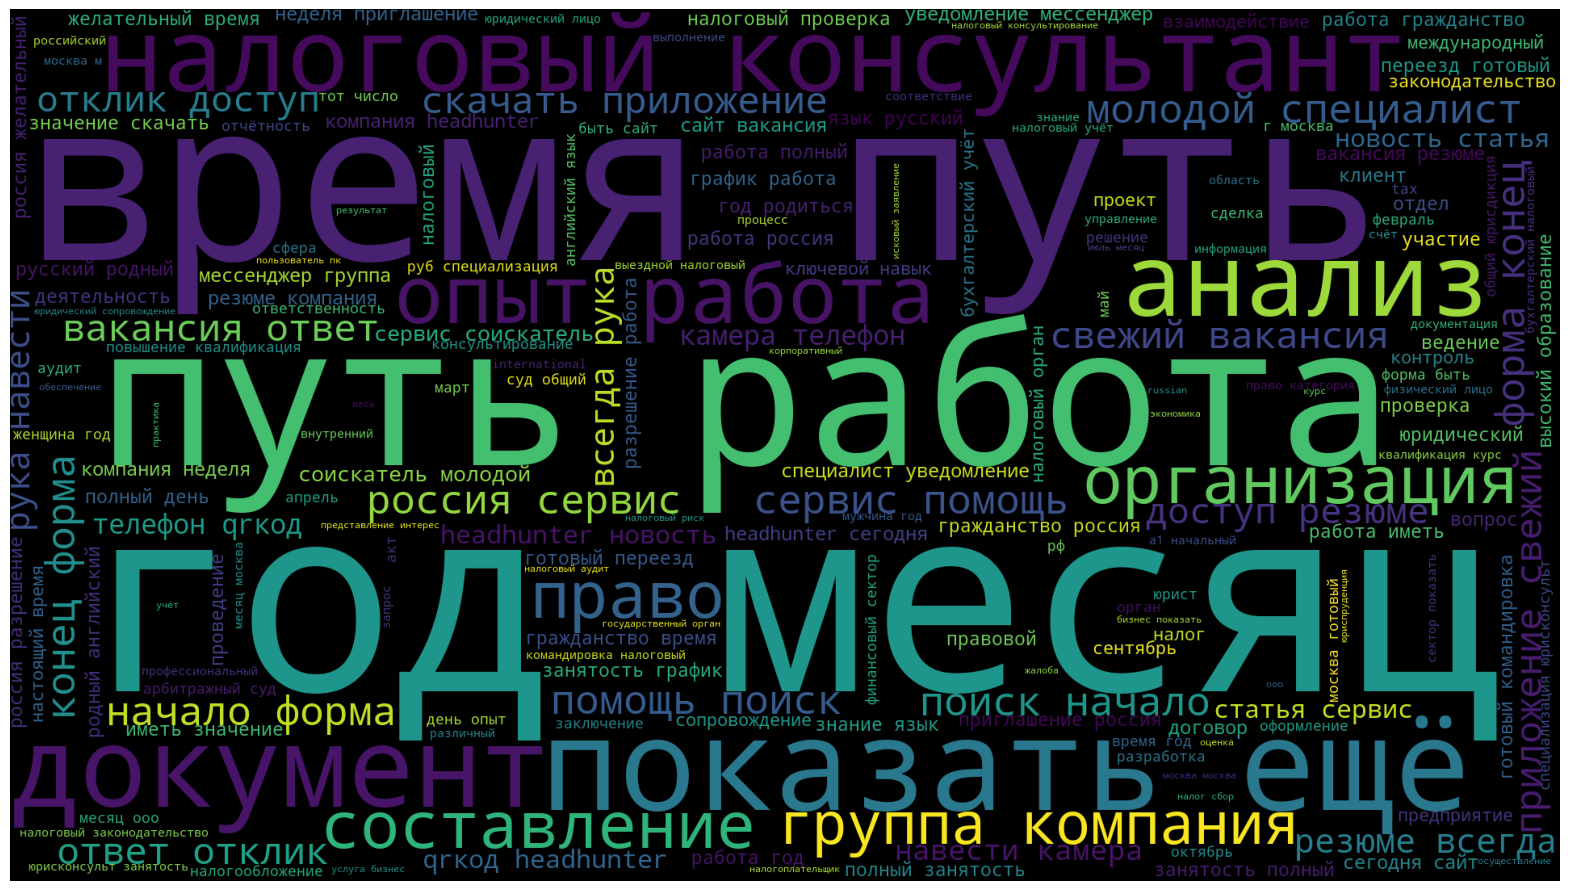

In [43]:
from wordcloud import WordCloud


text_raw = " ".join(text)
wordcloud = WordCloud(
    width=1920, 
    height=1080
).generate(text_raw)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis("off")
